In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.manifold import TSNE
import numpy as np

%matplotlib inline

In [3]:
# Load in Data
aapl = pd.read_csv('AAPL.csv')
goog = pd.read_csv('GOOG.csv')
amzn = pd.read_csv('AMZN.csv')

In [20]:
#Combine into one DataFrame
combined = pd.DataFrame(index=aapl['Date'])
combined['AAPL'] = aapl['Close'].values.copy()
combined['GOOG'] = goog['Close'].values.copy()
combined['AMZN'] = amzn['Close'].values.copy()

In [32]:
#Generate windows and normalise
data = combined.values

window = 14

window_data = np.array([data[i:i+window] for i in range(len(data) - window)])
normed_data = window_data /np.mean(window_data, axis=1).reshape(-1,1,3)

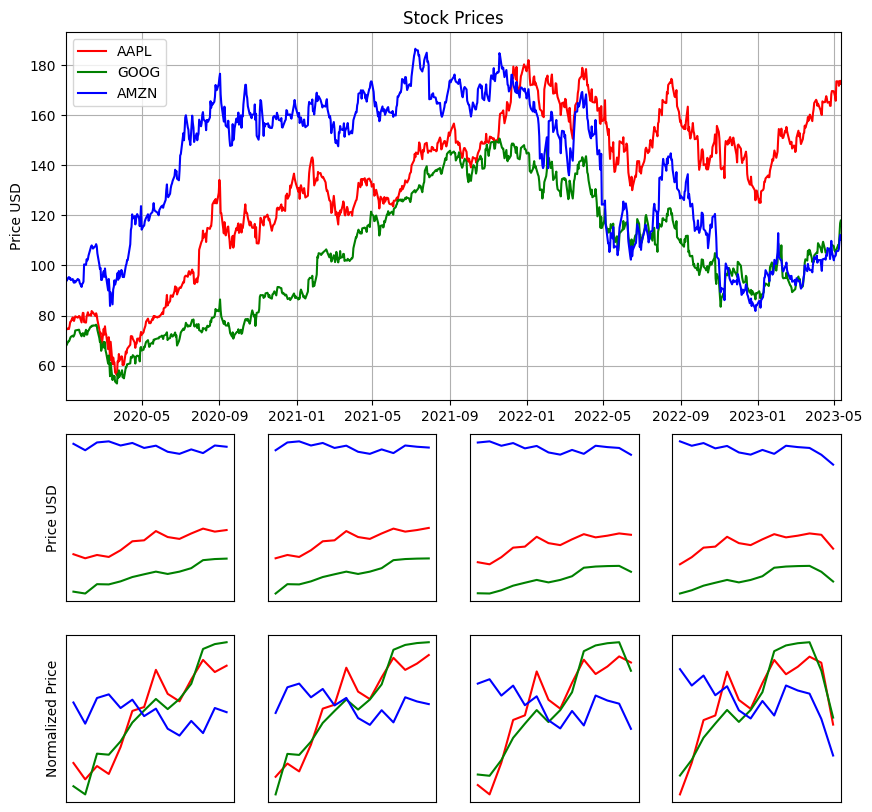

In [50]:
#Plot Data and example windows
fig = plt.figure(figsize=(10, 10))

gs = GridSpec(4, 4, figure=fig)

ax = fig.add_subplot(gs[0:2, :])
for stock in ['AAPL', 'GOOG', 'AMZN']:
    ax.plot(combined[stock], label=stock, color=cmap[stock])

ax.set_title('Stock Prices')
ax.set_ylabel('Price USD')
ax.legend()
ax.set_xlim(combined.index.min(),combined.index.max())
ax.grid()

for i in range(4):
    ax = fig.add_subplot(gs[2, i])

    if i == 0:
        ax.set_ylabel('Price USD')

    for ii in range(3):
        ax.plot(window_data[i, :, ii], color=cmap[combined.columns[ii]])
    
    ax.set_xticks([])
    ax.set_yticks([])

    ax = fig.add_subplot(gs[3, i])

    if i==0:
        ax.set_ylabel('Normalized Price')

    for ii in range(3):
        ax.plot(normed_data[i, :, ii], color=cmap[combined.columns[ii]])
    ax.set_xticks([])
    ax.set_yticks([])


plt.savefig("../../assets/images/stock.png")

In [51]:
#Run TSNE Model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(normed_data.reshape(-1, 3*14))


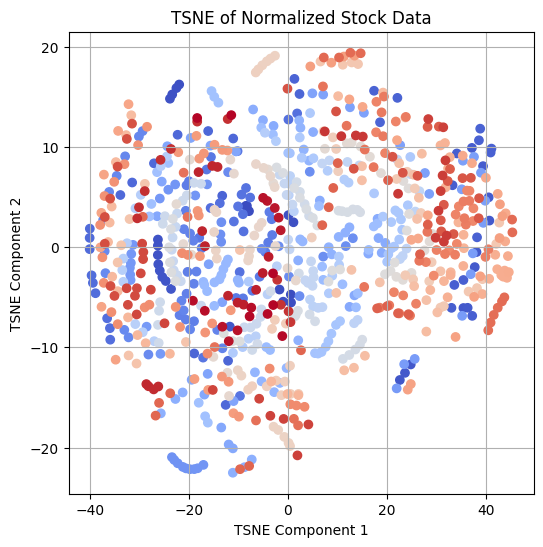

In [60]:
#Generate Initial scatterplot
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(tsne_data[:, 0], tsne_data[:, 1], c=np.arange(len(tsne_data)), cmap='coolwarm')
ax.grid()
ax.set_xlabel('TSNE Component 1')
ax.set_ylabel('TSNE Component 2')
ax.set_title('TSNE of Normalized Stock Data')
plt.savefig("../../assets/images/tsne_raw.png")

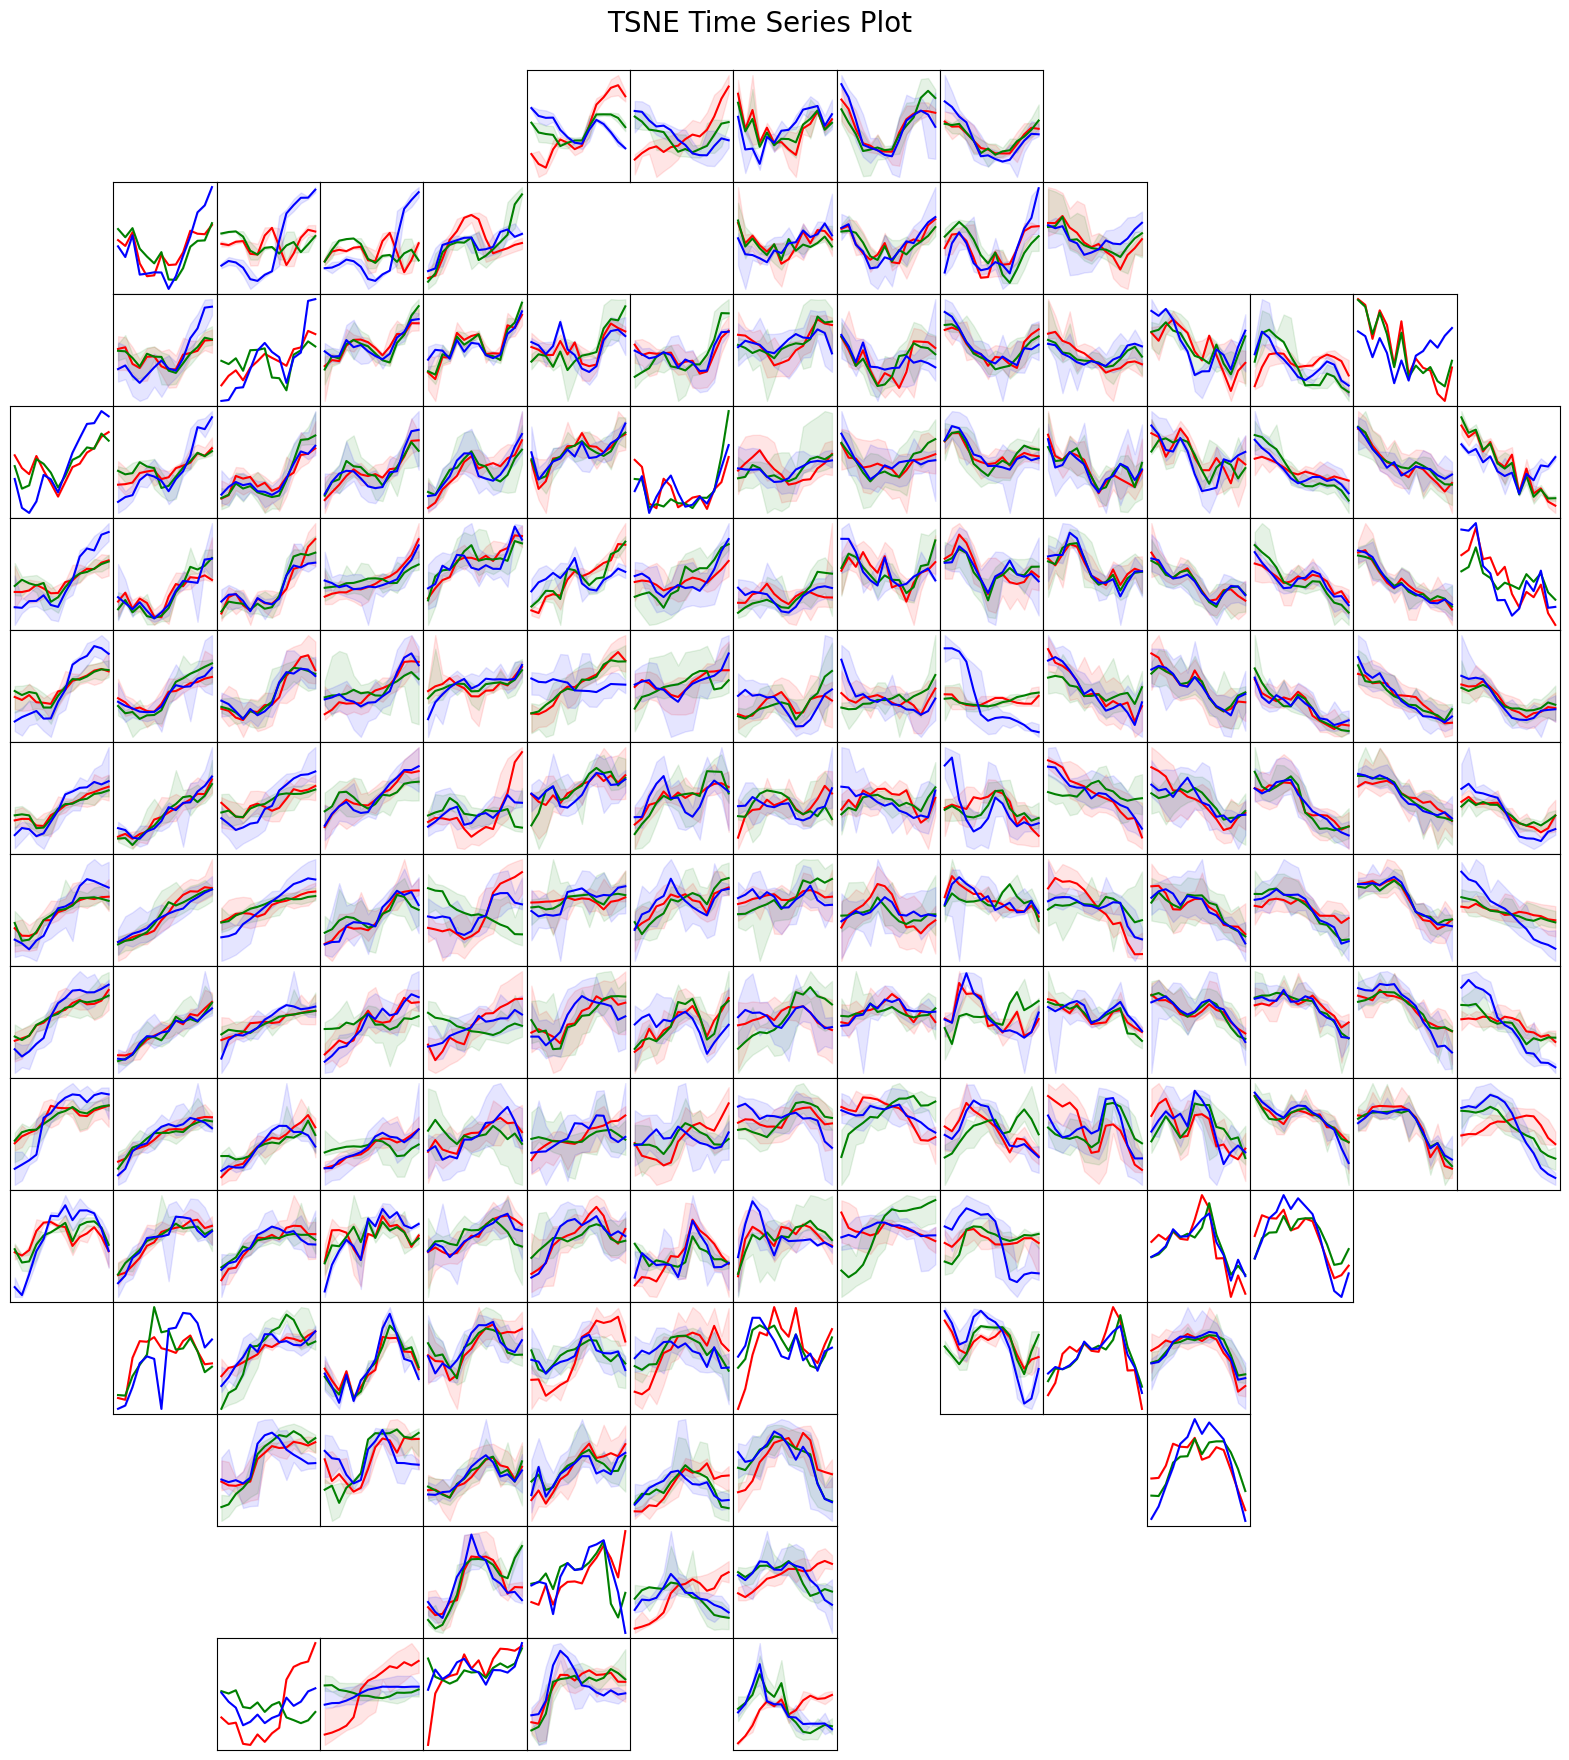

In [72]:
#Generate TSNE Time Series Plot
nrows = ncols = 15

fig = plt.figure(figsize=(20, 20))
gs = GridSpec(nrows, ncols, figure=fig, wspace=0,hspace=0)

min_x = np.min(tsne_data[:, 0])
max_x = np.max(tsne_data[:, 0])
min_y = np.min(tsne_data[:, 1])
max_y = np.max(tsne_data[:, 1])

xs = np.linspace(min_x, max_x, ncols+1)
ys = np.linspace(min_y, max_y, nrows+1)

for i in range(nrows):
    for j in range(ncols):
        in_group = (tsne_data[:, 0] > xs[j]) & (tsne_data[:, 0] < xs[j+1]) & (tsne_data[:, 1] > ys[ncols-i-1]) & (tsne_data[:, 1] < ys[ncols-i])

        if sum(in_group)>0:
            ax = fig.add_subplot(gs[i, j])
            subset = normed_data[in_group]

            medians = np.median(subset, axis=0)
            maxs = np.max(subset, axis=0)
            mins = np.min(subset, axis=0)

            for ii in range(3):
                ax.plot(medians[:, ii], color=cmap[combined.columns[ii]])
                ax.fill_between(np.arange(14), mins[:, ii], maxs[:, ii], color=cmap[combined.columns[ii]], alpha=0.1)
            
            ax.set_xticks([])
            ax.set_yticks([])

# make the title be not far above content
fig.subplots_adjust(top=0.95)
fig.suptitle("TSNE Time Series Plot", fontsize=20)

plt.savefig("../../assets/images/tsne.png")